In [36]:
rt = []
filepath = 'final_stkde.txt'
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        curr = line.split(",")
        rt.append([float(curr[0]), float(curr[1]), float(curr[2]), float(curr[3][:-1])])

In [37]:
rt[0]

[3000000.0, 8700000.0, 44.0, 3.5606519473684714e-13]

In [38]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [39]:
#import numpy as np
#threshold = np.percentile(column(rt, 3), 99)

In [40]:
arr = sorted(column(rt, 3), reverse=True)
threshold = arr[3119]

In [41]:
final_rt = []
for i in range(0, len(rt)):
    if (rt[i][3]>threshold):
        final_rt.append(rt[i])

In [42]:
threshold

1.1225598498703742e-09

In [43]:
len(final_rt)

3119

In [10]:
rt_str = "{"
for i in range(0, len(final_rt)):
    for j in range(0, int(round(final_rt[i][3]/threshold))):
        rt_str = rt_str+"{"+str(final_rt[i][0])+","+str(final_rt[i][1])+","+str(final_rt[i][2])+"},"
rt_str = rt_str+"}"

In [11]:
f = open("rt_new.txt", "w")
f.write(rt_str)
f.close()

In [12]:
cluster = {}

In [13]:
cluster.keys()

dict_keys([])

In [15]:
max(column(final_rt, 2))

75.0

In [16]:
arr = sorted(column(rt, 3), reverse=True)

In [26]:
long= [-73.970174, -87.645455, -95.393037, -118.261862, -80.499045, -84.468182, -121.832375, -123.032229, -104.880625]
lat = [40.776557,41.894294, 29.857273, 34.196398, 25.610494, 33.790034, 47.493554, 37.727239, 39.761849]

In [29]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
df = pd.DataFrame({'id': ["New York City", "Chicago", "Houston", "LA", "Miami", "Atlanta", "Seattle", "San Francisco", "Denver"], 'longitude': long, 'latitude': lat})
s = gpd.GeoSeries([Point(x,y) for x, y in zip(df['longitude'], df['latitude'])])

geo_df = gpd.GeoDataFrame(df[['id']], geometry=s)
# Define crs for our geodataframe:
geo_df.crs = {'init': 'epsg:4326'} 

geo_df = geo_df.to_crs({'init': 'epsg:3857'})

In [30]:
geo_df

,id,geometry
0,New York City,POINT (-8234322.104 4979439.528)
1,Chicago,POINT (-9756647.421 5145158.326)
2,Houston,POINT (-10619104.304 3485216.780)
3,LA,POINT (-13164850.258 4055204.064)
4,Miami,POINT (-8961112.699 2950918.389)
5,Atlanta,POINT (-9402955.008 4000643.446)
6,Seattle,POINT (-13562317.947 6023010.053)
7,San Francisco,POINT (-13695885.083 4540965.167)
8,Denver,POINT (-11675257.769 4831394.937)


[3000000.0, 8800000.0, 65.0, 1.143465070023482e-09]

In [45]:
for i in range(0, len(final_rt)):
    temp_x = final_rt[i][0]
    temp_y = final_rt[i][1]
    final_rt[i][0]= -1*temp_y
    final_rt[i][1]= temp_x
    final_rt[i][3]= final_rt[i][3]/(6.487534251720931e-07)

In [47]:
final_rt[1]

[-8800000.0, 3000000.0, 66.0, 0.0022857463389333375]

In [48]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [62]:
for index, row in geo_df.iterrows():
    index = row[0]
    x = row[1].x
    y = row[1].y
    print (x)

-8234322.103569845
-9756647.420944773
-10619104.304063905
-13164850.25810439
-8961112.698744815
-9402955.008473556
-13562317.947135154
-13695885.083441427
-11675257.769080278


In [122]:
from datetime import datetime, timedelta
x = datetime(2020, 1, 21)+timedelta(days=1.0)
x

datetime.datetime(2020, 1, 22, 0, 0)

In [117]:
final_rt[0]

[-8800000.0, 3000000.0, 65.0, 0.0017625572762412127]

In [123]:
from datetime import datetime, timedelta
final_dict = {}
for i in range(0, len(final_rt)):
    min_dist_index = "NA"
    min_dist = "NA"
    curr_x = final_rt[i][0]
    curr_y = final_rt[i][1]
    curr_t = datetime(2020, 1, 21)+timedelta(days=int(final_rt[i][2]))
    curr_v = final_rt[i][3]   
    for index, row in geo_df.iterrows():
        index = row[0]
        x = row[1].x
        y = row[1].y
        temp_dist = (curr_x-x)**2+(curr_y-y)**2
        if (min_dist=="NA" or temp_dist<min_dist):
            min_dist = temp_dist
            min_dist_index = index
    try:
        final_dict[min_dist_index].append( (curr_v,curr_t) )
    except:
        final_dict[min_dist_index]=[(curr_v,curr_t)]
        
    
    

In [124]:
final_dict.keys()

dict_keys(['Miami', 'Houston', 'Atlanta', 'LA', 'New York City', 'San Francisco', 'Chicago', 'Denver', 'Seattle'])

In [128]:
curr_dict={}
data = final_dict['Miami']
for data


datetime.datetime(2020, 3, 26, 0, 0)

In [104]:
count=0
for key in final_dict.keys():
    data = final_dict[key]
    for i in range(0, len(data)):
        final_df.loc[count]=[key]+[float(data[i])]
        count= count+1



In [103]:
final_df = pd.DataFrame(columns=['Cluster', 'Normalized Output from STKDE'])
final_df

,Cluster,Normalized Output from STKDE


In [105]:
final_df

,Cluster,Normalized Output from STKDE
0,Miami,0.001763
1,Miami,0.002286
2,Miami,0.002904
3,Miami,0.003302
4,Miami,0.003304
...,...,...
3114,Seattle,0.001753
3115,Seattle,0.002093
3116,Seattle,0.001968
3117,Seattle,0.001946


Text(0.5, 0, 'Cluster')

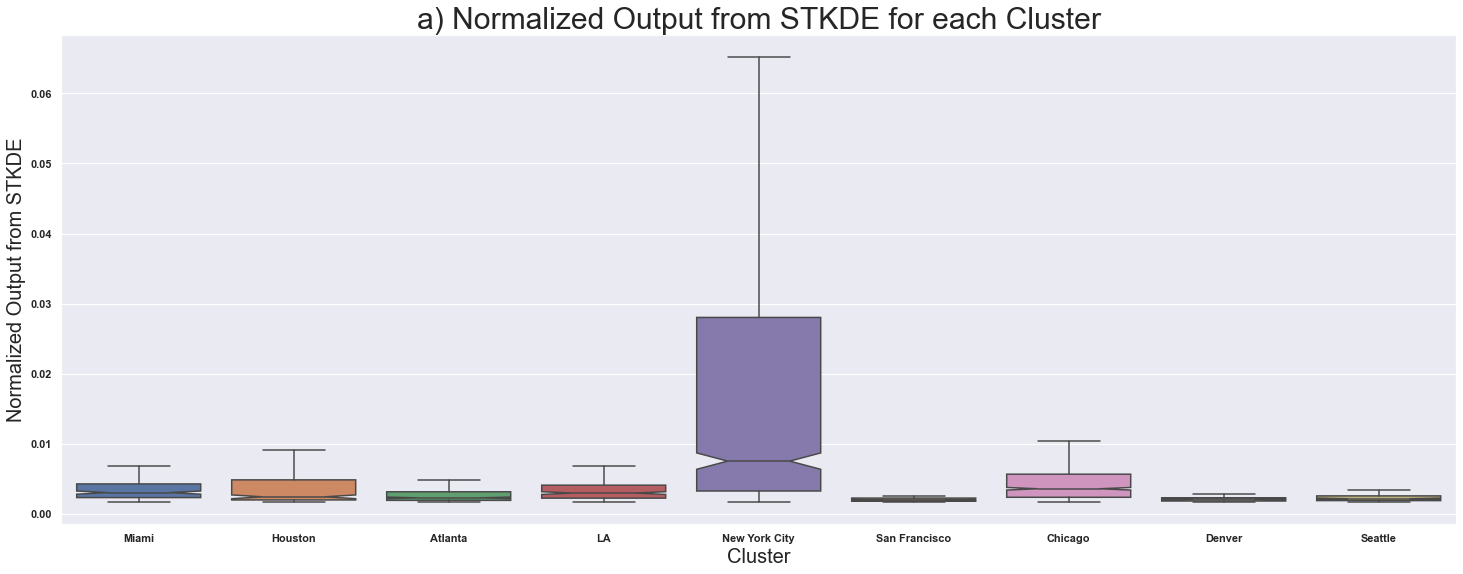

In [227]:
%matplotlib inline
plt.figure(figsize=(25,9))
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.title("He")
# Add notch
b=sns.boxplot( x=final_df["Cluster"], y=final_df["Normalized Output from STKDE"], notch=True, showfliers=False)

b.axes.set_title("a) Normalized Output from STKDE for each Cluster",fontsize=30)
b.set_ylabel("Normalized Output from STKDE",fontsize=20)
b.set_xlabel("Cluster",fontsize=20)
#.set_title("a) Normalized Output from STKDE for each Cluster")
#sns.plt.show()


In [73]:
y=df["sepal_length"]

In [75]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [142]:
curr_dict={}
data = final_dict['Houston']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v

In [159]:
miami = list(curr_dict.items())

In [162]:
miami

[(datetime.datetime(2020, 4, 3, 0, 0), 0.013991186678816879),
 (datetime.datetime(2020, 3, 31, 0, 0), 0.005826526773297819),
 (datetime.datetime(2020, 4, 1, 0, 0), 0.009410166254591063),
 (datetime.datetime(2020, 4, 2, 0, 0), 0.013108091290134677),
 (datetime.datetime(2020, 4, 4, 0, 0), 0.011522914217968711),
 (datetime.datetime(2020, 3, 28, 0, 0), 0.0033560008130938766),
 (datetime.datetime(2020, 3, 26, 0, 0), 0.0030316134613668755),
 (datetime.datetime(2020, 3, 27, 0, 0), 0.003428654227106684),
 (datetime.datetime(2020, 3, 29, 0, 0), 0.002911343858389361),
 (datetime.datetime(2020, 3, 30, 0, 0), 0.00347720261671367),
 (datetime.datetime(2020, 3, 25, 0, 0), 0.00245995293824199),
 (datetime.datetime(2020, 3, 24, 0, 0), 0.0020152148056942236)]

In [168]:
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami

[(datetime.datetime(2020, 3, 24, 0, 0), 0.0020152148056942236),
 (datetime.datetime(2020, 3, 25, 0, 0), 0.00245995293824199),
 (datetime.datetime(2020, 3, 26, 0, 0), 0.0030316134613668755),
 (datetime.datetime(2020, 3, 27, 0, 0), 0.003428654227106684),
 (datetime.datetime(2020, 3, 28, 0, 0), 0.0033560008130938766),
 (datetime.datetime(2020, 3, 29, 0, 0), 0.002911343858389361),
 (datetime.datetime(2020, 3, 30, 0, 0), 0.00347720261671367),
 (datetime.datetime(2020, 3, 31, 0, 0), 0.005826526773297819),
 (datetime.datetime(2020, 4, 1, 0, 0), 0.009410166254591063),
 (datetime.datetime(2020, 4, 2, 0, 0), 0.013108091290134677),
 (datetime.datetime(2020, 4, 3, 0, 0), 0.013991186678816879),
 (datetime.datetime(2020, 4, 4, 0, 0), 0.011522914217968711)]

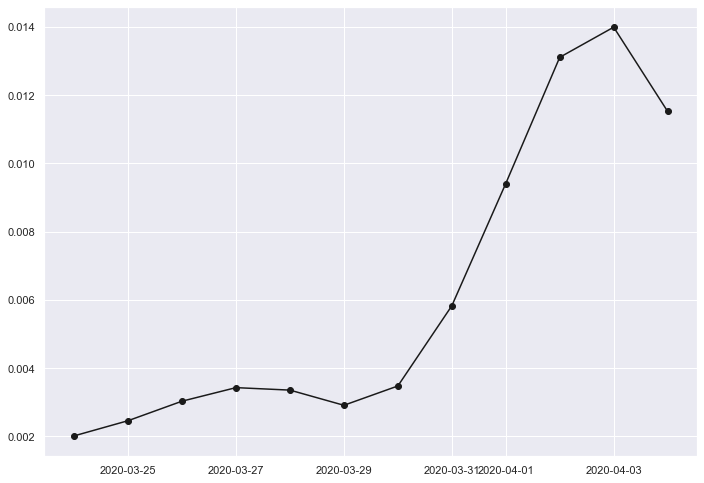

In [169]:
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), '-ok')

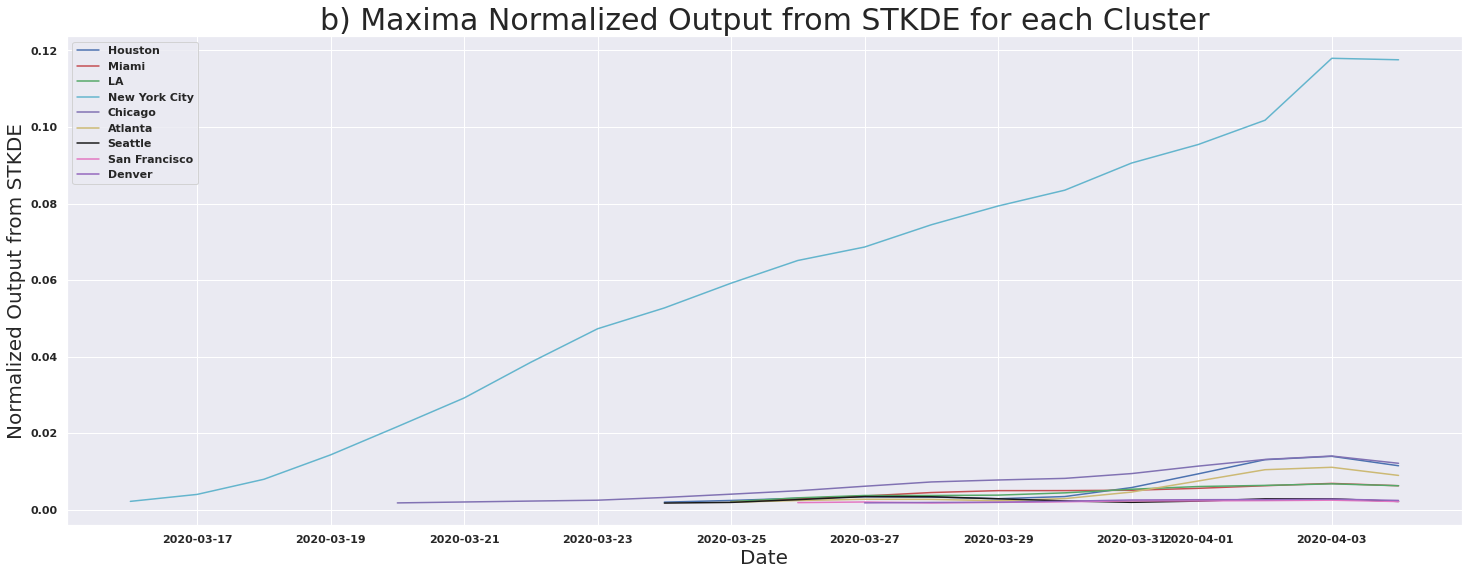

In [221]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

matplotlib.rc('font', **font)
plt.figure(figsize=(25,9))
curr_dict={}
data = final_dict['Houston']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-b", label="Houston")

curr_dict={}
data = final_dict['Miami']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-r", label="Miami")


curr_dict={}
data = final_dict['LA']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-g", label="LA")

curr_dict={}
data = final_dict['New York City']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-c", label="New York City")

curr_dict={}
data = final_dict['Chicago']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-m", label="Chicago")


curr_dict={}
data = final_dict['Atlanta']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-y", label="Atlanta")



curr_dict={}
data = final_dict['Seattle']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "-k", label="Seattle")


curr_dict={}
data = final_dict['San Francisco']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), "tab:pink", label="San Francisco")

curr_dict={}
data = final_dict['Denver']
for i in range(0, len(data)):
    v = data[i][0]
    t = data[i][1]
    if (t!=datetime(2020, 4, 5)):
        if t not in curr_dict.keys():
            curr_dict[t]=v
        elif (curr_dict[t]<v):
            curr_dict[t]=v
miami = list(curr_dict.items())
sorted_miami = sorted(miami, key=lambda i: i[0], reverse=False)
sorted_miami
plt.plot(column(sorted_miami, 0), column(sorted_miami, 1), 'tab:purple', label="Denver")
plt.title("b) Maxima Normalized Output from STKDE for each Cluster", fontsize=30)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Normalized Output from STKDE", fontsize=20)

plt.legend(loc="upper left")

In [ ]:
,"Atlanta", "Seattle", "San Francisco", "Denver"

In [ ]:
 'w'